In [1]:
from sweep_utils import * 

In [2]:
param_configs = "../param_configs/attn_fista_rho_mu_sweep_20it.json"
script_name = "../scripts/run_fineweb1B_adam_fista.sh"
df, missing = load_sweep_jsons(param_configs, script_name)

Some files are missing: 
{'attn_fista_adamw-lr-0.001-constant-linear-4de4ec313bfd6196d91548b7b684f134.json', 'attn_fista_adamw-lr-0.001-constant-linear-bf56f5d99960cb806d9350c41207f359.json', 'attn_fista_adamw-lr-0.001-constant-linear-349804b68e1d89bd3da70c9b0e20a3b2.json', 'attn_fista_adamw-lr-0.001-constant-linear-925f0ad0bffa6b0ea0ff3bc7c6e44db2.json', 'attn_fista_adamw-lr-0.001-constant-linear-e4def872c3e4eb8e1dbab466aad2d4d4.json', 'attn_fista_adamw-lr-0.001-constant-linear-296ed4dc43833f8fee791f725d0b8637.json', 'attn_fista_adamw-lr-0.001-constant-linear-4bdc15ad4010d4f05c8ed69447602471.json', 'attn_fista_adamw-lr-0.001-constant-linear-c5d81c5f42a658a2fd13dc8c2eca7fda.json', 'attn_fista_adamw-lr-0.001-constant-linear-d722d7c9c58d68dd9ff7eac54e506c11.json', 'attn_fista_adamw-lr-0.001-constant-linear-1d199a3db6c9a8e2fae913df5bbb12af.json', 'attn_fista_adamw-lr-0.001-constant-linear-438829ab962db3f280d0a103b9193542.json', 'attn_fista_adamw-lr-0.001-constant-linear-4ac098eca189e30422

In [3]:
df[:5]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,attn_max_iter,lr,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.132182,4.121600,4.121600,426.00,233.50,248.749754,20,0.001,False,0.001,0.01,False
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.262536,4.252692,4.252692,97.50,75.00,73.072862,20,0.001,False,0.005,0.01,False
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.333110,4.322317,4.322317,41.25,33.25,33.611613,20,0.001,False,0.1,0.1,False
3,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.100666,4.090517,4.090517,552.00,376.00,383.652069,20,0.001,False,0.01,0.1,False
4,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.412988,4.407563,4.407563,37.75,21.50,22.412915,20,0.001,False,0.75,0.5,False


In [4]:
sorted(df["mu_frac"].unique()), sorted(df["rho_over_lr"].unique())

(['0.001', '0.005', '0.01', '0.05', '0.1', '0.5', '0.75'],
 ['0.01', '0.1', '0.5'])

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


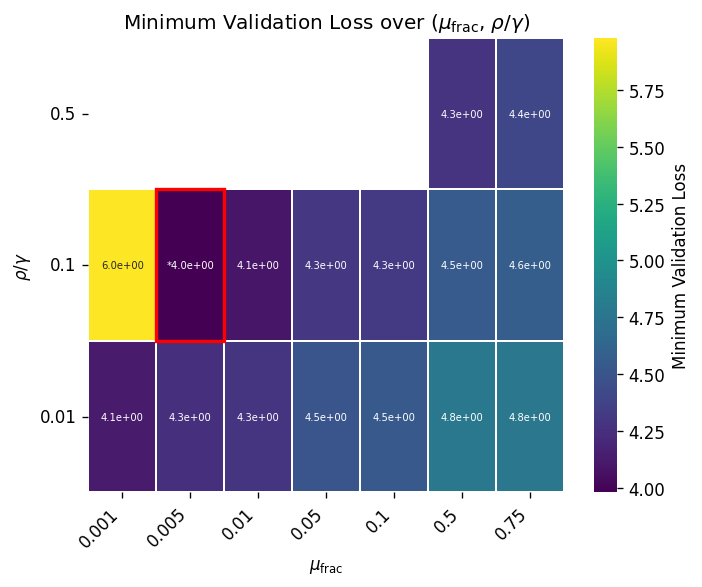

In [5]:
plot_heatmat_grid(df, value="min_val_loss")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


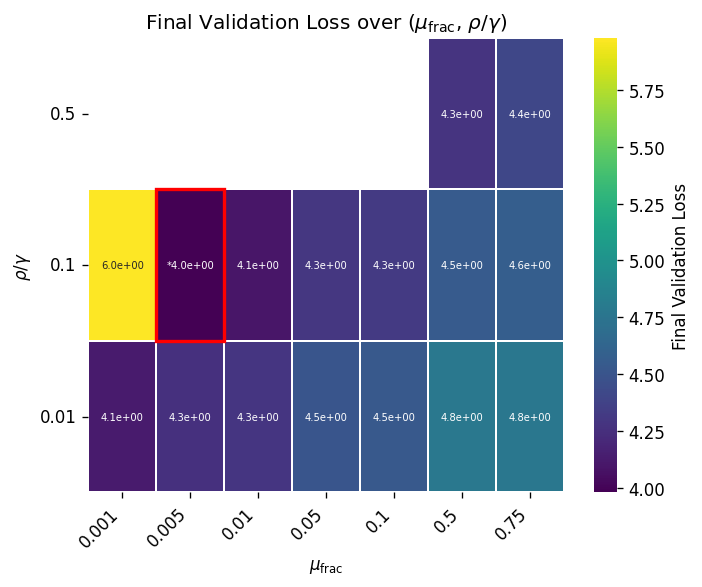

In [6]:
plot_heatmat_grid(df, value="fin_val_loss")

In [7]:
cols = ["min_val_loss", "kq_max", "mu_frac", "rho_over_lr"]
top5 = df.dropna(subset=cols).nsmallest(5, "min_val_loss")[cols].reset_index(drop=True)
print(top5)

   min_val_loss   kq_max mu_frac rho_over_lr
0      3.978792  1536.00   0.005         0.1
1      4.090517   552.00    0.01         0.1
2      4.121600   426.00   0.001        0.01
3      4.252692    97.50   0.005        0.01
4      4.279261    46.75     0.5         0.5


/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


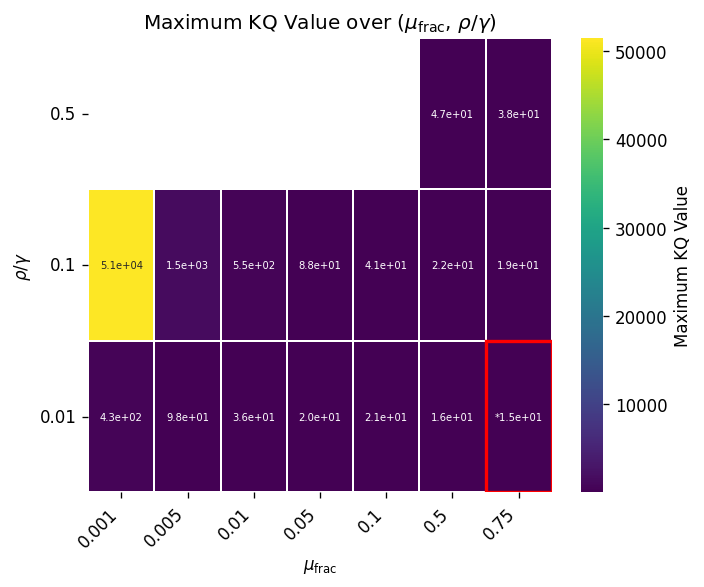

In [8]:
plot_heatmat_grid(df, value="kq_max")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


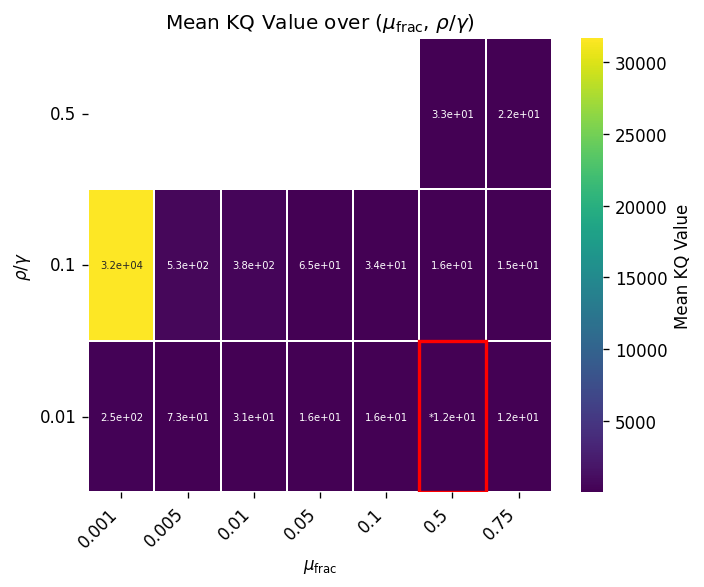

In [9]:
plot_heatmat_grid(df, value="kq_mean")